## Ngrams Revisited (A Quick Intro to Teaching Students to Code with Python)

As impressive as the Google Books Ngram Viewer is, it only allows us to ask a limited set of questions. Worse still, it puts students into the passive position of using a tool built by someone else, rather than building one for themselves.

By learning to code in Python with Jupyter Notebooks, we can write scripts that answer much more sophisticated questions. Before we get started, let's take a look at how a Jupyter Notebook works. Notebooks are composed of markdown (or text) cells in white, and coding cells in grey. You can modify the code in a coding cell, and then press `Shift` + `Enter` to run that snippet of code, saying "`Hello, World!`", and then modify it to say something else, like "`Let's start coding!`"

(NOTE: This notebook moves rather quickly, and it's really more of a demonstration. Properly teaching this material would require quite a bit more time. In a real situation, students would learn about each step of the process through more interactive notebooks that are designed as a series of problem sets.)

In [2]:
print("Hello, World!")

Hello, World!


Each coding cell actually runs the code it contains, as we can see when we run the cell below:

In [3]:
n = 2 + 2
print(n)

4


### A few words about this lesson

In this notebook, we're going to do a number of things that the Google Ngram Viewer can't. __Our central question is this: can simple counts of unigrams and bigrams tell us important things about particular literary works?__ It might look like a long lesson, but in reality it's just five simple operations. Here's what we'll do:

1. Graph the most common words in _The Prelude_;
2. Graph the most common bigrams in _The Prelude_;
3. Read all the books in a single file into a dictionary;
4. Count and graph one word across that corpus;
5. Count (and finally, visualize) a whole set of statistical measures for a corpus.

With each new operation, we'll introduce a few small tweaks that will make the script do something fundamentally different, but the structure of each operation will remain largely the same. First, we'll open a file or a set of files, then, we'll perform an operation on them, and finally, we'll get some kind of output.

To do this, we'll be using a number of curated corpora:

1. __18c_novels__ -> a set of 18th-century novels (by the likes of Defoe, Haywood, Fielding, Richardson, Burney, etc.), with standardized spelling (i.e. no long s's)
2. __18c_major_authors__ -> a set of 18th-century works from a variety of genres, with standardized spelling
3. __romantic_literature__ -> a set of works by British Romantic authors
4. __genius_files__ -> a set of hip-hop lyrics, taken from the website Genius
5. __popular_literature__ -> a small set of popular children's series, including _Harry Potter_, _The Lord of the Rings_, and _Dune_
6. __collected_literature__ -> all the collections combined, with no stemming and no stopwords

In a normal class, we would spend some time discussing the importance of preprocessing text and metadata. For this demonstration, I've  done all the processing in advance, so that each set exists in a number of states of preparation. This will allow us to quickly grab the most appropriate documents, and significantly decrease the time we spend waiting for code to run.

### 1. Graph the frequencies of the most common words in _The Prelude_, by William Wordsworth

When working with Google's Ngram Viewer, we asked about the occurence of Ngrams over broad swaths of history. Now that we're writing our own scripts, let's examine what unigrams (single words) and bigrams (two words that occur side-by-side) can tell us, first, about a single work, and then, second, about a larger corpus.

Let's start by opening the file for _The Prelude_ and reading it. Just like a physical book, in order to do things with a file computationally, you have to open the file as a <b>file object</b> and read the bytes that it contains.

In this case, we'll be using a version of _The Prelude_ that's been modified a bit. Its <b>stop words</b> ("the", "a", "and", etc.) have been removed, but it hasn't been <b>stemmed</b>, which means that `beauty` and `beauties` are still different words, and they haven't been collapsed into the same word `beauti`.

In [4]:
doc1 = open("romantic_literature/romantic_literature_clean_nostems_nostops/wordsworth_prelude.txt", "r")
doc1Txt = doc1.read()

What does that file look like?

In [5]:
print(doc1Txt[:250])

prelude book introduction childhood school oh blessing gentle breeze visitant fans cheek doth seem halfconscious joy brings green fields yon azure sky whateer mission soft breeze come none grateful escaped vast city pined discontented sojourner free 


The first 250 items in the file are all discrete characters. In order to recognize the words as discrete items, we have to tokenize the file. From time to time, we'll download a <b>library</b>. Libraries are collections of pre-written code that simplify writing code, and they're much of the reason why Python is such a powerful and appealing language. Here, we'll use a tokenizer called `punkt` to separate _The Prelude_ into distinct words. `punkt` is part of the `Natural Langauge Toolkit`, or `NLTK`, a massive collection of scripts that humanists working in DH use all the time.

In [6]:
import nltk
nltk.download("punkt")
words = nltk.tokenize.word_tokenize(doc1Txt)

[nltk_data] Downloading package punkt to /Users/osadetz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
print(words[:250])

['prelude', 'book', 'introduction', 'childhood', 'school', 'oh', 'blessing', 'gentle', 'breeze', 'visitant', 'fans', 'cheek', 'doth', 'seem', 'halfconscious', 'joy', 'brings', 'green', 'fields', 'yon', 'azure', 'sky', 'whateer', 'mission', 'soft', 'breeze', 'come', 'none', 'grateful', 'escaped', 'vast', 'city', 'pined', 'discontented', 'sojourner', 'free', 'free', 'bird', 'settle', 'dwelling', 'receive', 'vale', 'harbour', 'underneath', 'grove', 'home', 'clear', 'stream', 'murmur', 'lull', 'rest', 'earth', 'heart', 'joyous', 'scared', 'liberty', 'look', 'chosen', 'guide', 'better', 'wandering', 'cloud', 'miss', 'breathe', 'trances', 'thought', 'mountings', 'mind', 'come', 'fast', 'shaken', 'burthen', 'unnatural', 'heavy', 'weight', 'weary', 'day', 'mine', 'months', 'peace', 'bold', 'word', 'accord', 'promises', 'human', 'months', 'ease', 'undisturbed', 'delight', 'mine', 'prospect', 'whither', 'turn', 'road', 'pathway', 'trackless', 'field', 'hill', 'floating', 'river', 'point', 'cours

In [8]:
len(words)

27253

We've turned _The Prelude_ into a massive list of 27,253 words. By running the following two cells, let's make a chart of the words in the book, ordered by their frequency, and then graph the top 60.

In [9]:
from nltk.probability import FreqDist
import pandas as pd
from IPython.core.display import HTML

fdist_words = FreqDist(words)
count_frame_words = pd.DataFrame(fdist_words, index =['word_count']).T
count_frame_words = count_frame_words.sort_values('word_count', ascending=False)
display(HTML(count_frame_words.to_html()))

,word_count
mind,132
love,115
heart,110
power,98
nature,94
day,86
far,84
still,79
thus,78
less,76


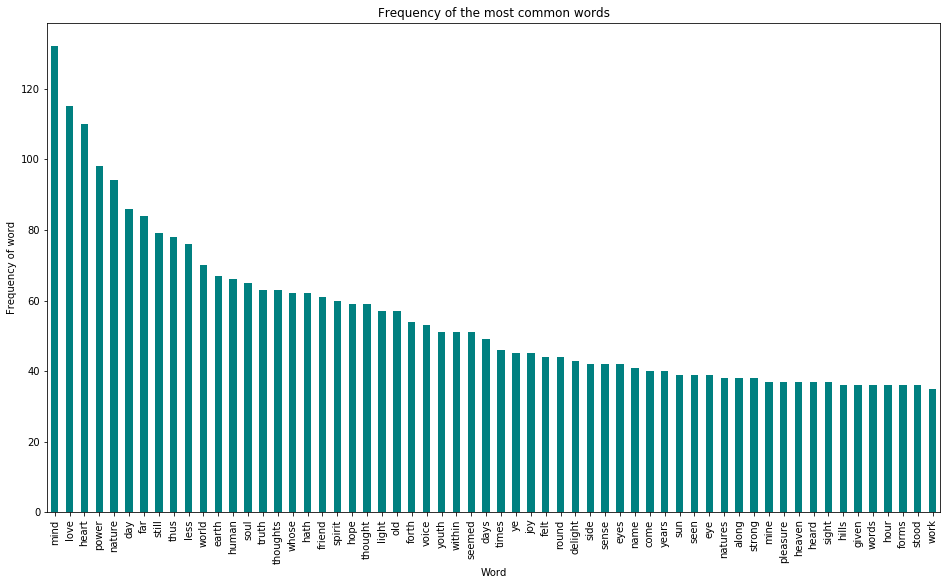

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
count_frame_words['word_count'][:60].plot(kind = 'bar', ax=ax, color='teal')
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

Already, this graph tells us a lot about Wordsworth's poem. Does it accord with your experience of the poem? Students might be asked to think about how these words reflect the subject matter of the poem, its concern with nature and human psychology is evident, but what might not be apparent is the lack of any proper nouns in these top words.

### 2. Graph the most common ngrams for _The Prelude_

Now that we've graphed the most common words, it's a simple matter to modify our script to count and graph the most common Ngrams. Before we do so, though, we have to change the file that we're using, because in this case we require stop words.

In [11]:
doc2 = open("romantic_literature/romantic_literature_clean/wordsworth_prelude.txt", "r")
doc2Txt = doc2.read()

In [12]:
words2 = nltk.tokenize.word_tokenize(doc2Txt)

In this case, we'll be using the `NLTK` library `ngrams`. That first block of code is all that's different. It simply cycles over every two words, making a list of the bigrams, as they occur. Want to try trigrams? Change `n = 3` and re-run the script. It's that simple.

(Pro tip!: If you change the main variable so that `n = 1`, you'll get a graph of unigrams, but this time with stop words included.)

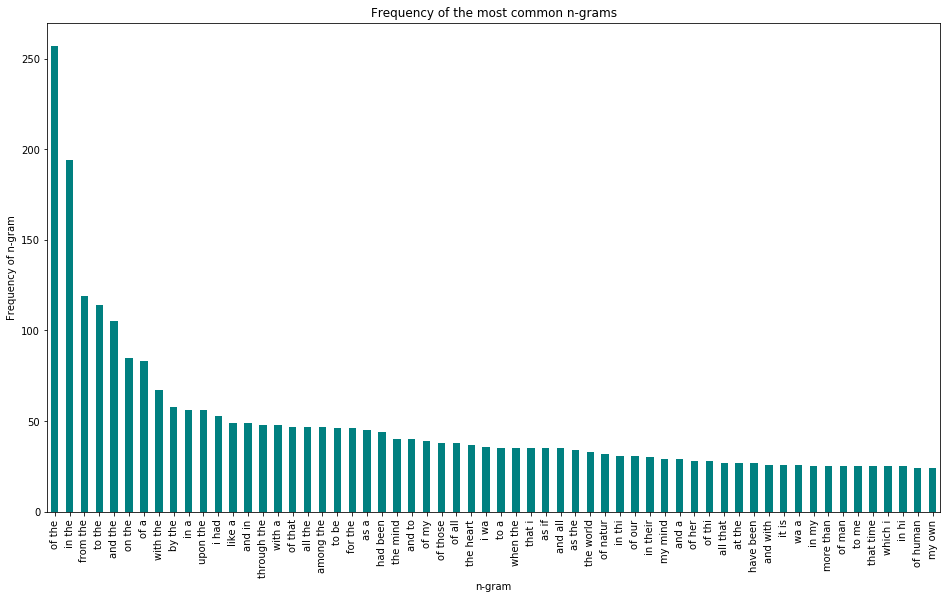

In [13]:
from nltk import ngrams

# Get n-grams where n = 2
n = 2
nGramsInDoc = []
nGrams = ngrams(words2, n)
for grams in nGrams:
    nWords = ' '.join(g for g in grams)
    nGramsInDoc.append(nWords)

# Count the frequency of each n-gram
fdist = FreqDist(nGramsInDoc)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 bigrams
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common n-grams')
ax.set_ylabel('Frequency of n-gram')
ax.set_xlabel('n-gram')
plt.show()

### 3. Add all the books in a folder to a dictionary

Now that we're becoming comfortable with unigrams and bigrams, let's practice working with a whole corpus of texts. The modules `os` and `glob`, which we'll be using in this case, allow us to use operating system functonality and identify a set of pathnames in a directory. This is a quick way to get a list of files, which we'll use in a moment.

In [14]:
import os

os.chdir("romantic_literature/romantic_literature_clean_nostems/")

print(os.getcwd())

/Users/osadetz/Documents/Professional_File/Digital_Project/teaching_demonstration/romantic_literature/romantic_literature_clean_nostems


In [15]:
import glob
filenames = glob.glob("*.txt")
print(filenames)

['burns_poems_and_songs.txt', 'shelley_mary_the_last_man.txt', 'barbauld_evenings_at_home.txt', 'southey_thalaba_the_destroyer.txt', 'keats_letters.txt', 'keats_poems_1817.txt', 'baillie_poems_1790.txt', 'southey_curse_of_kehama.txt', 'coleridge_biographia_literaria.txt', 'smith_emmeline.txt', 'wordsworth_dorothy_journals.txt', 'shelley_percy_prometheus_unbound.txt', 'wordsworth_prelude.txt', 'hemans_records_of_woman.txt', 'byron_childe_harold.txt', 'byron_don_juan.txt', 'shelley_mary_frankenstein.txt', 'coleridge_lyrical_ballads.txt']


Now that we have a list of the files in our directory, we just have to open and read them, as we did before. In this case, we'll make each file a value in a `dictionary`. Here, we'll be using a `loop`, an important coding concept that allows our code to iterate over each file in a directory. We used a loop in the last section, when we calculated Ngrams, but it was so brief that I passed over it. From now on, beacuse we'll be working with multiple files, loops will become a lot more important.

In [16]:
text_dictionary = {}

for file in filenames:
    with open(str(file), 'r') as inputFile:
        readFile = inputFile.read()
        text_dictionary[str(file).format(file)] = readFile

In this case, the identifying key for each book is just the name of its file.

In [17]:
text_dictionary.keys()

dict_keys(['burns_poems_and_songs.txt', 'shelley_mary_the_last_man.txt', 'barbauld_evenings_at_home.txt', 'southey_thalaba_the_destroyer.txt', 'keats_letters.txt', 'keats_poems_1817.txt', 'baillie_poems_1790.txt', 'southey_curse_of_kehama.txt', 'coleridge_biographia_literaria.txt', 'smith_emmeline.txt', 'wordsworth_dorothy_journals.txt', 'shelley_percy_prometheus_unbound.txt', 'wordsworth_prelude.txt', 'hemans_records_of_woman.txt', 'byron_childe_harold.txt', 'byron_don_juan.txt', 'shelley_mary_frankenstein.txt', 'coleridge_lyrical_ballads.txt'])

In [18]:
text_dictionary['wordsworth_prelude.txt'][:250]

'the prelude book first introduction childhood and school time oh there is blessing in this gentle breeze a visitant that while it fans my cheek doth seem halfconscious of the joy it brings from the green fields and from yon azure sky whateer its miss'

### 4. Count and graph one word across all the books in a corpus

Let's say you wanted to study the importance of a particular word across a number of books. We can start to do this by simply counting the number of time it occurs in a particular work.

In [19]:
search_word = "nature"

Here, we'll use the `split` method in much the same way as we used the `punkt` tokenizer earlier. We'll then use the `counter` library to count each time the token `nature` occurs. 

(Keep in mind that the texts we're examining haven't been `stemmed`, so `nature` and `natures` and `natural` are recognized as different tokens!)

In [20]:
from collections import Counter

for key in text_dictionary:
    word_counts = Counter(text_dictionary[key].split())
    print(key, "-> " + search_word + " =", word_counts[search_word])

burns_poems_and_songs.txt -> nature = 57
shelley_mary_the_last_man.txt -> nature = 156
barbauld_evenings_at_home.txt -> nature = 82
southey_thalaba_the_destroyer.txt -> nature = 31
keats_letters.txt -> nature = 40
keats_poems_1817.txt -> nature = 2
baillie_poems_1790.txt -> nature = 4
southey_curse_of_kehama.txt -> nature = 46
coleridge_biographia_literaria.txt -> nature = 173
smith_emmeline.txt -> nature = 41
wordsworth_dorothy_journals.txt -> nature = 31
shelley_percy_prometheus_unbound.txt -> nature = 9
wordsworth_prelude.txt -> nature = 94
hemans_records_of_woman.txt -> nature = 4
byron_childe_harold.txt -> nature = 20
byron_don_juan.txt -> nature = 32
shelley_mary_frankenstein.txt -> nature = 53
coleridge_lyrical_ballads.txt -> nature = 16


It looks as though `nature` is especially common in Coleridge's _Biographia Literaria_ and Mary Shelley's _The Last Man_. Let's use the following cells to print out a quick graph of its raw count for every text in our `romantic_literature` set.

In [21]:
search_df = pd.DataFrame(columns=["Count"])

In [22]:
for key in text_dictionary:
    search_df.loc[key] = Counter(text_dictionary[key].split())[search_word]

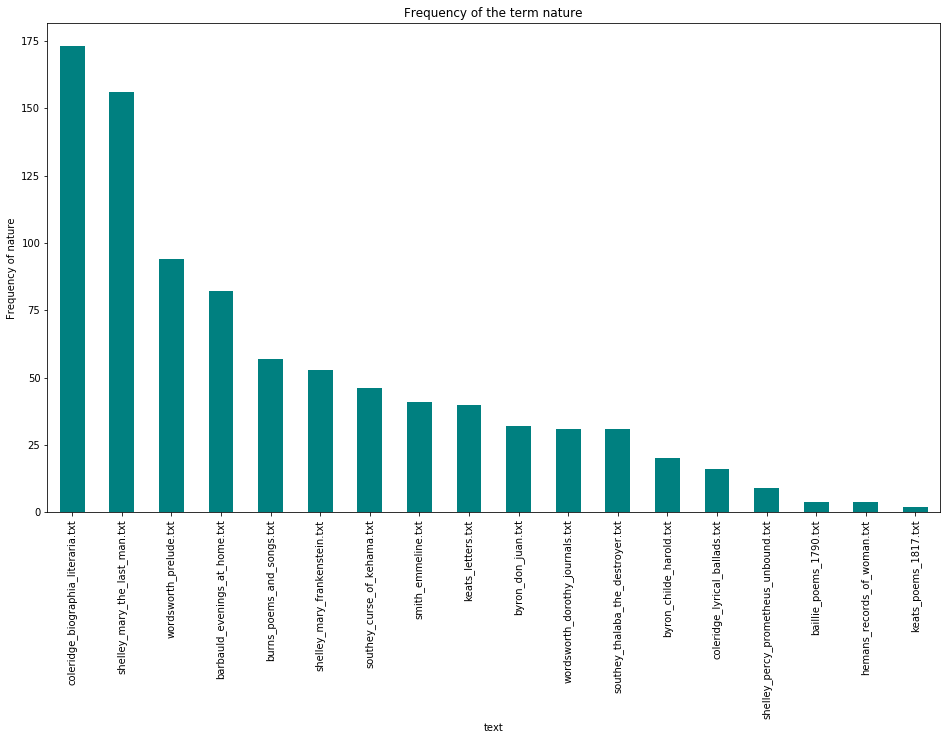

In [23]:
# Plot the frequency of the searchword
counts = search_df.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the term ' + search_word)
ax.set_ylabel('Frequency of ' + search_word)
ax.set_xlabel('text')
plt.show()

### 5. Get word count, unique words, variance, unique ngrams, and ngram variance for all books in directory (based on abridged set)

Simple raw counts of a particular word are fine, but there's an obvious problem: documents are different lengths. By introducing a few new lines of code, we can get the length of each file in a directory, its raw count of unigrams and bigrams, as well as their variance. Variance is just the raw count divided by the length of the volume.

In [27]:
os.chdir("/home/jovyan/collected_corpora/collected_corpora_keatsabbr/")

print(os.getcwd())

/Users/osadetz/Documents/Professional_File/Digital_Project/teaching_demonstration/collected_corpora/collected_corpora_keatsabbr


In [28]:
filenames = glob.glob("*.txt")

In [29]:
text_dictionary = {}

for file in filenames:
    with open(str(file), 'r') as inputFile:
        readFile = inputFile.read()
        text_dictionary[str(file).format(file)] = readFile

In [30]:
import collections

appended_data = []
n = 2

for text in text_dictionary:
        words = nltk.tokenize.word_tokenize(text_dictionary[text])
        total_count = len(words)
        discrete_count = len(list(dict.fromkeys(words)))

        ngrams_counter = collections.Counter()
        n_grams = nltk.ngrams(words, n)
        ngrams_counter.update(n_grams)
        ngrams_count = len(ngrams_counter)
        
        variance = str(discrete_count/total_count)
        ngrams_variance = str(ngrams_count/total_count)
        
        data = {'DocName':text, 'total_words':total_count, 'discrete_count':discrete_count, 'variance':variance, 'ngrams_count': ngrams_count, 'ngrams_variance': ngrams_variance}
        appended_data.append(data)

appended_data_df = pd.DataFrame(appended_data)

In this case, we're going to produce some data that's pretty startling. Normally, we'd write out our results to a `csv file`, which is like a simple type of spreadsheet. That's a bit complicated for the purposes of this demonstration, because it might be complicated to try to write files to your different computers. Instead, let's just print out the results.

In [32]:

display(HTML(appended_data_df.to_html()))


### Visualize the results

Now that you've got the data, you're welcome to download Tableau and manipulate it on your own. One of the nice things about Tableau is that it allows you to save your graph as a url, so that to see the results, all you have to do is click on the links below.

In these graphs, we'll be examining overall word (unigram) variance and bigram variance. Because we're only interested in one dimension of information, the X axis will be the only one that contains meaningful data. Any moment along the Y axis is just an artifact that I've introduced artificially, to help you better see differences in the data.

Here's the graph for unigram variance:

And this is the graph for bigram variance: